In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection

from shapely.geometry import Point,LineString

In [2]:
# https://stackoverflow.com/questions/45776737/anottating-along-a-matplotlib-curve
# https://stackoverflow.com/questions/18780198/how-to-rotate-matplotlib-annotation-to-match-a-line

In [3]:
import cv2
img = cv2.imread("BEL17-2-2_1.66x_milieu0001.png")

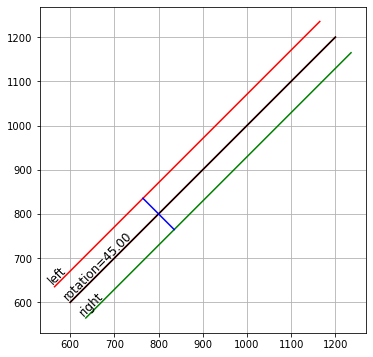

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.set_aspect('equal')

x1 = 600
y1 = 600
x2 = 1200
y2 = 1200
line, = ax.plot([x1, x2], [y1, y2], c='r')

# compute angle in raw data coordinates (no manual transforms)
dy = y2 - y1
dx = x2 - x1
angle = np.rad2deg(np.arctan2(dy, dx))

# annotate with transform_rotates_text to align text and line
plt.text(x1, y1, 'rotation=%.2f'%angle, ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor')

line = LineString([(x1,y1), (x2,y2)])
ax.plot(line.xy[0], line.xy[1], c='black')

left = line.parallel_offset(50, 'left')
right0 = line.parallel_offset(50, 'right')
right = LineString([right0.boundary.geoms[1], right0.boundary.geoms[0]])

ax.plot(left.xy[0], left.xy[1], c='r')
ax.plot(right.xy[0], right.xy[1], c='g')
ax.text(left.boundary.geoms[0].xy[0][0], left.boundary.geoms[0].xy[1][0], 'left', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)
ax.text(right.boundary.geoms[0].xy[0][0], right.boundary.geoms[0].xy[1][0], 'right', ha='left', va='bottom', fontsize=12,
         transform_rotates_text=True, rotation=angle, rotation_mode='anchor', clip_on=True)

c = Point(800,800)
a = left.interpolate(line.project(c))
b = right.interpolate(line.project(c))
ax.plot(a.coords[0], b.coords[0], c='b')
ax.grid()

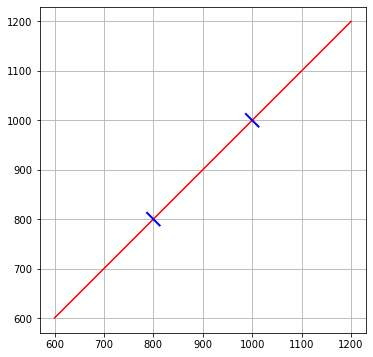

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.set_aspect('equal')

x1 = 600
y1 = 600
x2 = 1200
y2 = 1200
line, = ax.plot([x1, x2], [y1, y2], c='r')

ax.grid()

def draw_tick(line, x, y):
    line = LineString(line.get_xydata())   
    left = line.parallel_offset(20, 'left')
    right0 = line.parallel_offset(20, 'right')
    right = LineString([right0.boundary.geoms[1], right0.boundary.geoms[0]])   # flip order because right
    point = Point(x,y)
    a = left.interpolate(line.project(point))
    b = right.interpolate(line.project(point))
    line  = LineString([a, b])
    return line

aLine1 = draw_tick(line, 800, 800)
#ax.plot(aLine1.xy[0], aLine1.xy[1], c='b')

aLine2 = draw_tick(line, 1000, 1000)
#ax.plot(aLine2.xy[0], aLine2.xy[1], c='b')

#ax.plot(aLine1.coords[0],aLine1.coords[1])

a = []
a.append(aLine1.coords)
a.append(aLine2.coords)

lc = LineCollection(a, linewidths=2, colors='b')
ax.add_collection(lc)
    
plt.show()

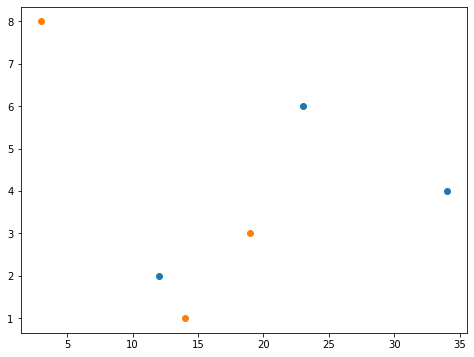

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

sc1 = ax.scatter([12,23,34],[2,6,4])
sc2 = ax.scatter([19,3,14],[3,8,1])

In [79]:
a = sc2.get_offsets()
b = sc1.get_offsets()
c = sc1.get_offsets()

In [94]:
sc1

In [93]:
l = [a.get_offsets() for a in [sc1, sc2]]

[masked_array(
   data=[[12.0, 2.0],
         [23.0, 6.0],
         [34.0, 4.0]],
   mask=[[False, False],
         [False, False],
         [False, False]],
   fill_value=1e+20),
 masked_array(
   data=[[19.0, 3.0],
         [3.0, 8.0],
         [14.0, 1.0]],
   mask=[[False, False],
         [False, False],
         [False, False]],
   fill_value=1e+20)]

In [92]:
np.concatenate(l)

masked_array(
  data=[[12.,  2.],
        [23.,  6.],
        [34.,  4.],
        [19.,  3.],
        [ 3.,  8.],
        [14.,  1.]],
  mask=False,
  fill_value=1e+20)

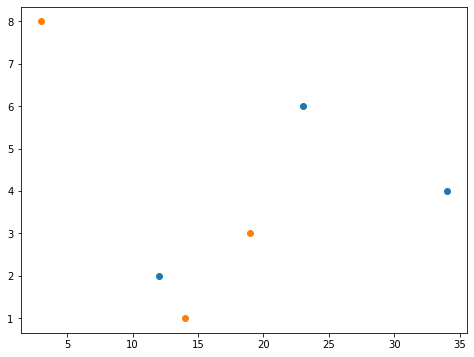

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sc1 = ax.scatter([12,23,34],[2,6,4])
sc2 = ax.scatter([19,3,14],[3,8,1])

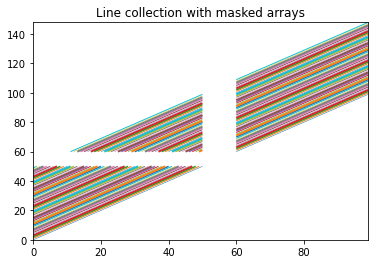

In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np

# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

x = np.arange(100)
# Here are many sets of y to plot vs. x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

# We need to set the plot limits.
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

# *colors* is sequence of rgba tuples.
# *linestyle* is a string or dash tuple. Legal string values are
# solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq) where
# onoffseq is an even length tuple of on and off ink in points.  If linestyle
# is omitted, 'solid' is used.
# See `matplotlib.collections.LineCollection` for more information.
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

In [6]:
segs.data

array([[[  0.,   0.],
        [  1.,   1.],
        [  2.,   2.],
        ...,
        [ 97.,  97.],
        [ 98.,  98.],
        [ 99.,  99.]],

       [[  0.,   1.],
        [  1.,   2.],
        [  2.,   3.],
        ...,
        [ 97.,  98.],
        [ 98.,  99.],
        [ 99., 100.]],

       [[  0.,   2.],
        [  1.,   3.],
        [  2.,   4.],
        ...,
        [ 97.,  99.],
        [ 98., 100.],
        [ 99., 101.]],

       ...,

       [[  0.,  47.],
        [  1.,  48.],
        [  2.,  49.],
        ...,
        [ 97., 144.],
        [ 98., 145.],
        [ 99., 146.]],

       [[  0.,  48.],
        [  1.,  49.],
        [  2.,  50.],
        ...,
        [ 97., 145.],
        [ 98., 146.],
        [ 99., 147.]],

       [[  0.,  49.],
        [  1.,  50.],
        [  2.,  51.],
        ...,
        [ 97., 146.],
        [ 98., 147.],
        [ 99., 148.]]])